# Dev workbook 1

## Script to copy blog posts from `posts/img` to `public/img`
- Size for internet
- Watermark

In [1]:
cd ../../../

/Users/alex/Documents/alexgalea.ca/alexgalea.ca-photoblog-flask-vuejs


In [5]:
ls

Dockerfile.client        app/                     requirements.txt
Dockerfile.client.build  app.json                 run.py
Dockerfile.server        dev/                     run_client.sh*
HISTORY.md               dist/                    run_server.sh*
LICENSE.md               docker-compose.yaml      src/
LINKS.txt                docs/                    tests/
Makefile                 node_modules/            tox.ini
Procfile                 package.json             update_public_posts.py
README.md                posts/                   vue.config.js
VERSION                  public/                  yarn.lock


In [31]:
import glob
import os
import pathlib


### Load posts

In [32]:

post_folders = glob.glob("posts/img/*/*/*", recursive=True)
post_folders = [pathlib.Path(folder) for folder in post_folders]
post_folders

[PosixPath('posts/img/2020/10/3-earthquake-foot'),
 PosixPath('posts/img/2020/10/4-lakota-dream-of-what-was-to-be'),
 PosixPath('posts/img/2020/10/1-joy-in-life'),
 PosixPath('posts/img/2020/10/2-the-story-of-s7ayulh-thunder'),
 PosixPath('posts/img/2020/09/1-thunderbird')]

In [33]:
post_folders[0].exists()

True

In [34]:
post_folders[0]

PosixPath('posts/img/2020/10/3-earthquake-foot')

In [35]:
def read_post_images(post_fp):
    with open((post_fp/"post.json"), "r") as f:
        iamge_file = f.read()
        
    

def update_public_images():
    pass





In [36]:
read_post_images(post_folders[0])

{
    "title": "Earthquake Foot",
    "desc": "",
    "photos_taken_date": "August 2020",
    "cover_image": "",
    "body": {
        "divs": [
            {
                "type": "text",
                "text": "TODO: find stormy photos of howe sound!"
            },
            {
                "type": "text",
                "text": "On the coast of what is now the state of Washington, Thunderbird and Whale had a fight,"
            },
            {
                "type": "photo",
                "file": ""
            },
            {
                "type": "text",
                "text": "This caused the mountains to shake and uprooted the trees. The ocean rose up and covered the whole land."
            },
            {
                "type": "text",
                "text": "To the North on Vancouver Island, dwarfs who lived in a mountain were dancing around their drum."
            },
            {
                "type": "text",
                "text": "When someone acci

In [55]:


def read_post_images(post_fp):
    images = []
    with open((post_fp / "post.json"), "r") as f:
        post = json.loads(f.read())
        print(post['title'])
        for block in post["body"]["divs"]:
            if block["type"] == "photo":
                photo = block["file"]
                if not photo:
                    continue
                images.append(photo)
    return images



def read_posts():
    post_folders = glob.glob(POST_PATH, recursive=True)
    post_folders = [pathlib.Path(folder) for folder in post_folders]
    return post_folders


In [56]:
import json

In [57]:
POST_PATH = "posts/img/*/*/*"
PUB_PATH = "public"


In [58]:
post_fps = read_posts()
for fp in post_fps:
    image_files = read_post_images(fp)
    for image in image_files:
        image_fp = (fp / image)
        pub_image_fp = PUB_PATH / (pathlib.Path(*fp.split()[1:]) / image)
        print(image_fp, pub_image_fp)
#         shutil.copy(image_fp, pub_image_fp)

Earthquake Foot


TypeError: string indices must be integers

In [176]:
post_slug = "1-joy-in-life"



import json
import glob
import os
import pathlib

import traceback

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

POST_PATH = "posts/img/*/*/*"
PUB_PATH = "public"
MAX_PX_SIZE = 1080
WATERMARK = "© Alexander Galea"

def main():
#     args = parse_args()
#     post_slug = args.post_slug
    if post_slug:
        print(f"Copying single post: {post_slug}")
    else:
        print("Copying all posts")
    
    post_fps = read_posts()
    for fp in post_fps:
        if post_slug and not str(fp).endswith(post_slug):
            continue
        print(f"Processing {fp}")
        try:
            image_files = read_post_images(fp)
        except:
            print(f"Failed to read images in post: {fp}")
            print(traceback.print_exc())
            
        for image in image_files:
            image_fp = (fp / image["file"])
            pub_image_fp = PUB_PATH / (pathlib.Path(*fp.parts[1:]) / image["file"])
            print(image_fp)
            
            image_obj = load_image(image_fp)
            image_obj = resize_pixels(image_obj, MAX_PX_SIZE)
            image_obj = add_watermark(image_obj, WATERMARK, date=image["date"])
#             write_image(image_obj, pub_image_fp)
            

def parse_args():
    import argparse
    parser = argparse.ArgumentParser(description="Convert images in posts to public images for website")
    parser.add_argument(
        "--post-slug",
        default="",
        help=(
            "Update a single post (skip the rest). "
            "Example slug: 4-lakota-dream-of-what-was-to-be"
        )
    )
    args = parser.parse_args()
    return args

            
def load_image(image_fp):
    image = Image.open(image_fp).convert("RGBA")
    return image
    


def add_watermark(image_obj, watermark_text, **kwargs):
    photo_date = kwargs["date"]
    
    txt_obj = Image.new("RGBA", image_obj.size, (255,255,255,0))
    font = ImageFont.truetype("./fonts/PlayfairDisplay-Black.ttf", 40)
    draw = ImageDraw.Draw(txt_obj)
    w, h = image_obj.size
    draw.text((w-400, 50), watermark_text, (255,255,255, 30), font=font)
    draw.text((50, h-100), photo_date, (255,255,255, 30), font=font)
    image_obj = Image.alpha_composite(image_obj, txt_obj)
        
#     from matplotlib.pyplot import imshow
#     import numpy as np        
#     image_obj.convert('RGB').save('./dev/watermark.jpg')
#     imshow(np.asarray(image_obj), aspect='auto')
#     raise
    
    return image_obj


    

def resize_pixels(image_obj, max_px_size):
    width_0, height_0 = image_obj.size

    if max((width_0, height_0)) <= max_px_size:
        # The image is smaller than the crop size, do nothing
        return image_obj

    if width_0 > height_0:
        wpercent = max_px_size / float(width_0)
        hsize = int(float(height_0) * float(wpercent))
        img = image_obj.resize((max_px_size, hsize), Image.ANTIALIAS)
        return img
    else:
        hpercent = max_px_size / float(height_0)
        wsize = int(float(width_0) * float(hpercent))
        img = image_obj.resize((wsize, max_px_size), Image.ANTIALIAS)
        return img
            

def read_posts():
    post_folders = glob.glob(POST_PATH, recursive=True)
    post_folders = [pathlib.Path(folder) for folder in post_folders]
    return post_folders

def read_post_images(post_fp):
    images = []
    with open((post_fp / "post.json"), "rb") as f:
        post = json.load(f)
        for block in post["body"]["divs"]:
            if block["type"] == "photo":
                photo = block["file"]
                if not photo:
                    continue
                images.append({})
                images[-1]["file"] = photo
                images[-1]["date"] = post["photos_taken_date"]
    return images

def write_image(image_obj, pub_image_fp):
    image_obj.convert("RGB").save(pub_image_fp)


Copying single post: 1-joy-in-life
Processing posts/img/2020/10/1-joy-in-life
posts/img/2020/10/1-joy-in-life/1-20200415-IMG_5172-2.jpg


RuntimeError: No active exception to reraise

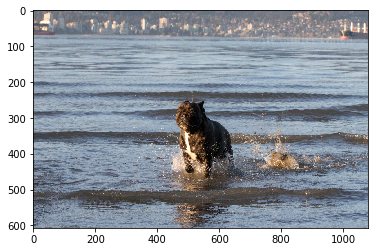

In [175]:
main()